In [275]:


with open(r'D:\客服AI质检项目\logs_rasa\511\rasa_io.log',encoding='utf8') as fin:
    log_ls = []
    for lin in fin.readlines():
        if not lin.startswith('2024-0'): continue
        if "ERROR - exception" in lin: continue
        if 'INFO - query' in lin: 
            line = lin.strip().split(' - INFO - query: ')
            # print(line)
            q_dt = eval(line[1])
            log_ls.append([line[0],q_dt['sender'], q_dt['message'], 'query'])
            # print(log_ls)
            # break
        elif 'INFO - response' in lin: 
            line = lin.strip().split(' - INFO - response: ')
            # print(line)
            res = line[1].split(', time: ')
            # print(res)
            res_ls = eval(res[0])
            if not res_ls: continue
            last_message = res_ls[-1]['last_message']
            log_ls.append([line[0],res_ls[-1]['recipient_id'], last_message['text'].replace('语言模型，', 'servicer：'), 'response', res[-1]])
            # log_ls.append([line[0],q_dt['sender'], q_dt['message']])
            # print(log_ls)
            # break
        # if 'INFO - handle_message' in lin or 'INFO - parse_message' in lin or 'INFO - parse_slots' in lin or 'INFO - output_' in lin: 
        else:
            line = lin.strip().split(' - INFO - ')
            # print(line)
            lin_ls = line[1].split(maxsplit=3)
            log_ls.append([line[0],lin_ls[1].strip(':'), lin_ls[2].replace('语言模型，', 'servicer:'), lin_ls[0]])
            # print(log_ls)
            # break

In [274]:
log_ls

[['2024-05-10 14:51:00,213', '1715323830', 'servicer：啊，说说一下完整的吧', 'query'],
 ['2024-05-10 14:51:00,252', '1715323838', '5158', 'query'],
 ['2024-05-10 14:51:00,335', '1715323844', '啊，我报一下订单号，你你查一下吧', 'query'],
 ['2024-05-10 14:51:00,338', '1715323851', '就中通的理赔件了', 'query'],
 ['2024-05-10 14:51:01,568', '1715323841', '，不用不用不用', 'query'],
 ['2024-05-10 14:51:01,575',
  '1715323834',
  '不是拒收退回的，是他重新转发到新疆的吗？这个不是',
  'query'],
 ['2024-05-10 14:51:01,716', '1715323860', '这样的了哦，好，那你帮我问一下吧', 'query'],
 ['2024-05-10 14:51:01,734',
  '1715323847',
  '，然后中转仓，再从转寄的话是中通快递，然后那边丢件了，他说理赔到你们圆通公司的',
  'query'],
 ['2024-05-10 14:51:03,174',
  '1715323860',
  '这样的了哦，好，那你帮我问一下吧',
  'response',
  '1.46'],
 ['2024-05-10 14:51:06,298', '1715323864', '报名单号', 'query'],
 ['2024-05-10 14:51:07,617', '1715323864', '报名单号', 'response', '1.32'],
 ['2024-05-10 14:51:08,585', '1715323867', '576', 'query'],
 ['2024-05-10 14:51:10,603', '1715323867', '576', 'response', '2.02'],
 ['2024-05-10 14:51:10,914', '1715323869', 

In [276]:
import pandas as pd
# repr()
# 示例的 Python 列表
data = [
    [1, 'Alice', 25, 0],
    [2, 'Bob', 30],
    [3, 'Charlie', 35]
]

# 将 Python 列表转换为 Pandas DataFrame
df = pd.DataFrame(log_ls, columns=['time', 'sender', 'text', 'label', 'cost'])

# 将 DataFrame 写入 Excel 文件，index=False 表示不写入行索引
df.to_excel('output511.xlsx', index=False)

In [277]:
texts_dt = {}
for rec in log_ls:
    # print(rec)
    rec[1] = str(rec[1])
    key = '_'.join(rec[1:3]).strip()
    if key not in texts_dt: texts_dt[key] = []
    texts_dt[key].append(rec[3])
    # break
# texts_dt = {'_'.join(rec[1:3]): texts_dt.get('_'.join(rec[1:3]), []).append(rec[3]) for rec in log_ls}
texts_sel_dt = {}
texts_sel_dt = {k: texts_dt[k] for k in texts_dt if 'response' not in texts_dt[k]}
# for k in texts_dt:
#     if '01c432d77e176f2f3e20efb247cd3aad' in k: 
#         print(k, '--' ,texts_dt[k])
#     if 'response' not in texts_dt[k]:
#         # print(k, texts_dt[k])
#         texts_sel_dt[k] = texts_dt[k]
texts_sel_ls = [sel for sel in log_ls if '_'.join(sel[1:3]) in texts_sel_dt]
len(texts_sel_ls)
# texts_dt


368

In [234]:
import datetime
 
datetime.datetime.now()


datetime.datetime(2024, 5, 10, 13, 14, 44, 814813)

In [259]:
import time

tm_stp = time.time()

int(time.time())

1715318443

In [278]:
import pandas as pd
# repr()
# 示例的 Python 列表
data = [
    [1, 'Alice', 25, 0],
    [2, 'Bob', 30],
    [3, 'Charlie', 35]
]

# 将 Python 列表转换为 Pandas DataFrame
df = pd.DataFrame(texts_sel_ls, columns=['time', 'sender', 'text', 'label'])

# print(df.shape,df.iloc[1078])
# for i in df.iloc:
#     print(i)
# 将 DataFrame 写入 Excel 文件，index=False 表示不写入行索引
df.to_excel('texts_sel511.xlsx', index=False)

In [16]:
from datetime import datetime

date_string = "2024-05-05 20:11:04,738"
# 使用 strptime() 函数将字符串解析为 datetime 对象
date_time_obj = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S,%f")

# 使用 timestamp() 方法将 datetime 对象转换为时间戳（单位：秒）
timestamp = datetime.timestamp(date_time_obj)

print("时间戳:", timestamp)

时间戳: 1714911064.738


In [212]:
# D:\客服AI质检项目\logs_rasa\508\cpu_usage.log
from datetime import datetime, timedelta
with open(r'D:\客服AI质检项目\logs_rasa\508\cpu_usage.log',encoding='utf8') as fin:
    rec_ls = []
    for lin in fin.readlines():
        # print(lin.strip().split(": "))
        rec = lin.strip().split(": ")
        if len(rec) > 1:
            rec_ls.append([datetime.strptime(rec[0], "%Y-%m-%d %H:%M:%S").timestamp(), rec[1]])
        # break

print(rec_ls[:10])

[[1714970491.0, '36.0'], [1714970493.0, '4.4'], [1714970495.0, '28.6'], [1714970497.0, '6.9'], [1714970499.0, '6.0'], [1714970501.0, '5.0'], [1714970503.0, '33.4'], [1714970505.0, '13.5'], [1714970507.0, '0.0'], [1714970509.0, '4.6']]


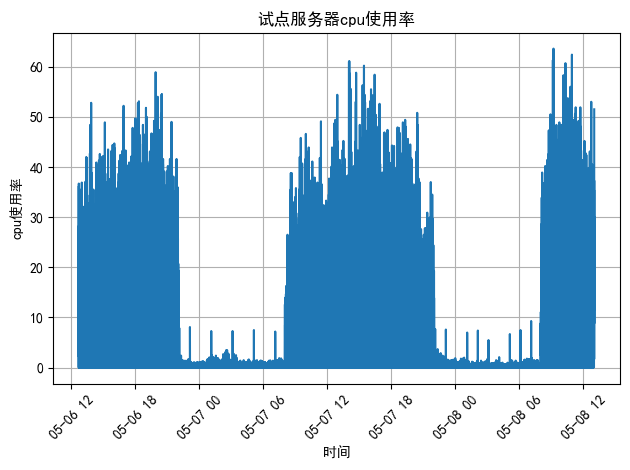

In [221]:
import matplotlib.pyplot as plt
import pytz
# 将数据转换为DataFrame对象
df = pd.DataFrame(rec_ls, columns=['timestamp', 'value'])

# 将timestamp列转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
# 将timestamp转换为北京时间
beijing_tz = pytz.timezone('Asia/Shanghai')
df['timestamp'] = df['timestamp'].dt.tz_localize(pytz.utc).dt.tz_convert(beijing_tz)

# 将value列转换为float类型
df['value'] = df['value'].astype(float)

# 绘制折线图
plt.plot(df['timestamp'], df['value'])
plt.title('试点服务器cpu使用率')
plt.xlabel('时间')
plt.ylabel('cpu使用率')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 显示图形
plt.show()

AttributeError: '_iLocIndexer' object has no attribute 'plot'

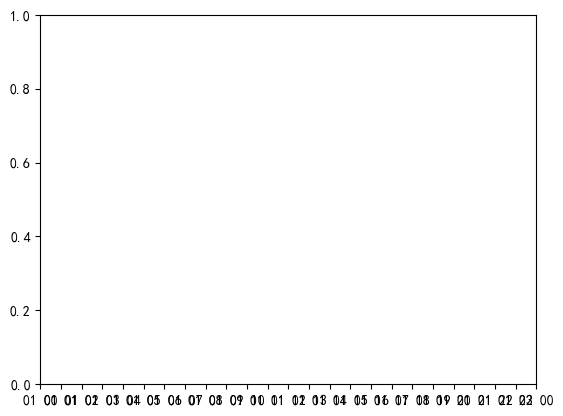

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
# mylist = grp_rslt_ls
mylist = rec_ls

fig, ax = plt.subplots()
df = pd.DataFrame(mylist).iloc
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
# 设置x轴的主刻度标签格式
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
# df.set_index(0, inplace=True)
df.plot(kind='line', figsize=(12, 4),grid=True,ax=ax)
# print(df)
# 添加标签
plt.title('5分钟超时')
plt.xlabel('time/s')
plt.ylabel('data')
plt.show()

In [227]:
from pprint import pprint
user_messages=[{'intent': 'ask_express_id', 'text': '喂，你好，我查快递单号。', 'usr_type': 0, 'sender_id': '118bbdcb724e36c225dde2c72d9d4593', 'express_id_piece': True, 'express_id': False}, {'intent': 'input_servicer', 'text': '语言模型，嗯，好的，您说。', 'usr_type': 0}, {'intent': 'inform', 'text': 'yt 7424.', 'usr_type': 0}, {'intent': 'inform', 'text': '1793.', 'usr_type': 0}, {'intent': 'inform', 'text': '49577.', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，好，您是收件人。', 'usr_type': 0}, {'intent': 'has_not_received', 'text': '这个客户说没有收到货，然后他现在。', 'usr_type': 0}, {'intent': 'has_not_received', 'text': '这个客户说没有收到货，然后他现在。', 'usr_type': 0}, {'intent': 'has_not_received', 'text': '他说没有收到货。', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，去年11月份的快件吗？', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，是什么物品没有收到啊？', 'usr_type': 0}, {'intent': 'check_express_status', 'text': '我看一下。', 'usr_type': 0}, {'intent': 'check_express_status', 'text': '我看一下。', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，嗯，你看一下，因为这。', 'usr_type': 0}, {'intent': 'package_lack', 'text': '是一个榨汁杯，榨汁杯。', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，榨汁杯啊，这时间也比较长了啊，价值呢。', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，414的。', 'usr_type': 0}, {'intent': 'package_damage', 'text': '榨汁杯。', 'usr_type': 0}, {'intent': 'package_damage', 'text': '榨汁杯。', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，噢，价值就金额多少钱？', 'usr_type': 0}, {'intent': 'specify_method_not_him_want_address', 'text': '56块钱。', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，56是吧？现在找到的话是。', 'usr_type': 0}, {'intent': 'urge_to_send', 'text': '语言模型，呃，退回呢还是重新派送啊？', 'usr_type': 0}, {'intent': 'urge_to_send', 'text': '语言模型，呃，退回呢还是重新派送啊？', 'usr_type': 0}, {'intent': 'urge_to_send', 'text': '重新派送。', 'usr_type': 0}, {'intent': 'urge_to_get_express', 'text': '他现在过去取了，他之前前段时间他他不在家。', 'usr_type': 0}, {'intent': 'input_servicer', 'text': '语言模型，好的，我理解了，那我这边给您对接啊，联系一下收件人去处理一下好吗？', 'usr_type': 0}, {'intent': 'specify_method_not_him_want_address', 'text': '呃，他这个物流信息显示是给他放到驿站了是吗？', 'usr_type': 0}, {'intent': 'specify_method_not_him_want_address', 'text': '呃，他这个物流信息显示是给他放到驿站了是吗？', 'usr_type': 0}, {'intent': 'pretend_signed', 'text': '语言模型，他这个件的话应该是在e站代签收，因为客户长时间没取e站呢，它系统自动签收了这个件。', 'usr_type': 0}, {'intent': 'urge_to_send', 'text': '行，他这个是什么时候送？', 'usr_type': 0}, {'intent': 'is_ok', 'text': '嗯，好勒好。', 'usr_type': 0}]
pprint(user_messages)


[{'express_id': False,
  'express_id_piece': True,
  'intent': 'ask_express_id',
  'sender_id': '118bbdcb724e36c225dde2c72d9d4593',
  'text': '喂，你好，我查快递单号。',
  'usr_type': 0},
 {'intent': 'input_servicer', 'text': '语言模型，嗯，好的，您说。', 'usr_type': 0},
 {'intent': 'inform', 'text': 'yt 7424.', 'usr_type': 0},
 {'intent': 'inform', 'text': '1793.', 'usr_type': 0},
 {'intent': 'inform', 'text': '49577.', 'usr_type': 0},
 {'intent': 'input_servicer', 'text': '语言模型，好，您是收件人。', 'usr_type': 0},
 {'intent': 'has_not_received', 'text': '这个客户说没有收到货，然后他现在。', 'usr_type': 0},
 {'intent': 'has_not_received', 'text': '这个客户说没有收到货，然后他现在。', 'usr_type': 0},
 {'intent': 'has_not_received', 'text': '他说没有收到货。', 'usr_type': 0},
 {'intent': 'input_servicer', 'text': '语言模型，去年11月份的快件吗？', 'usr_type': 0},
 {'intent': 'input_servicer', 'text': '语言模型，是什么物品没有收到啊？', 'usr_type': 0},
 {'intent': 'check_express_status', 'text': '我看一下。', 'usr_type': 0},
 {'intent': 'check_express_status', 'text': '我看一下。', 'usr_type': 0},
 {'in